Compy and tunepy modules are testing with a smaller size of web scraping here (5,200 car information), and hyperparameter tuning is not actually tuning the model.  The purpose here is just to see if compy.py and tunepy.py work.

In [1]:
# pandas and sqlalchmey are for checking dataframe before database table updating from current web scraping
import pandas as pd
from sqlalchemy import create_engine

# The modules below are used for the pipline to work
from compy import get_car_urls, get_car_city_urls, get_features, complete_make, simplify_drivetrain, simplify_fuel_type, simplify_transmission, simplify_engine, pipeline
from tunepy import get_best_param, scores_with_best_param

In [2]:
# Existing data in the database
engine = create_engine('sqlite:///test.db')
df = pd.read_sql('SELECT * FROM test;', engine)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  149 non-null    object
 1   price                 149 non-null    int64 
 2   mpg                   149 non-null    int64 
 3   mileage               149 non-null    int64 
 4   num_of_entertainment  149 non-null    int64 
 5   num_of_safety         149 non-null    int64 
 6   year                  149 non-null    int64 
 7   drivetrain            149 non-null    object
 8   fuel_type             149 non-null    object
 9   transmission          149 non-null    object
 10  engine                149 non-null    object
 11  make                  149 non-null    object
 12  model                 149 non-null    object
dtypes: int64(6), object(7)
memory usage: 15.3+ KB


In [ ]:
pipeline(1, [78704, 9001])

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
DATA FROM WEB SCRAPING:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197 entries, 0 to 2196
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  2197 non-null   object
 1   price                 2197 non-null   object
 2   mpg                   2034 non-null   object
 3   mileage               2197 non-null   object
 4   drivetrain            2197 non-null   object
 5   fuel_type             2197 non-null   object
 6   transmission          2197 non-null   object
 7   engine                2197 non-null   object
 8   num_of_entertainment  2142 non-null   object
 9   num_of_safety         2061 non-null   object
dtypes: object(10)

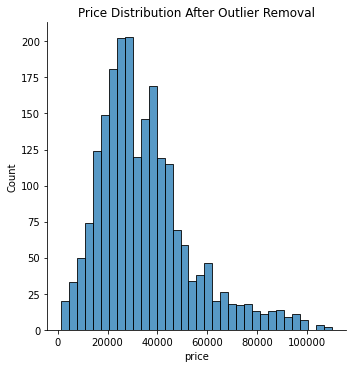

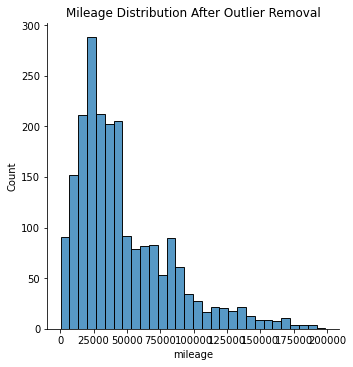

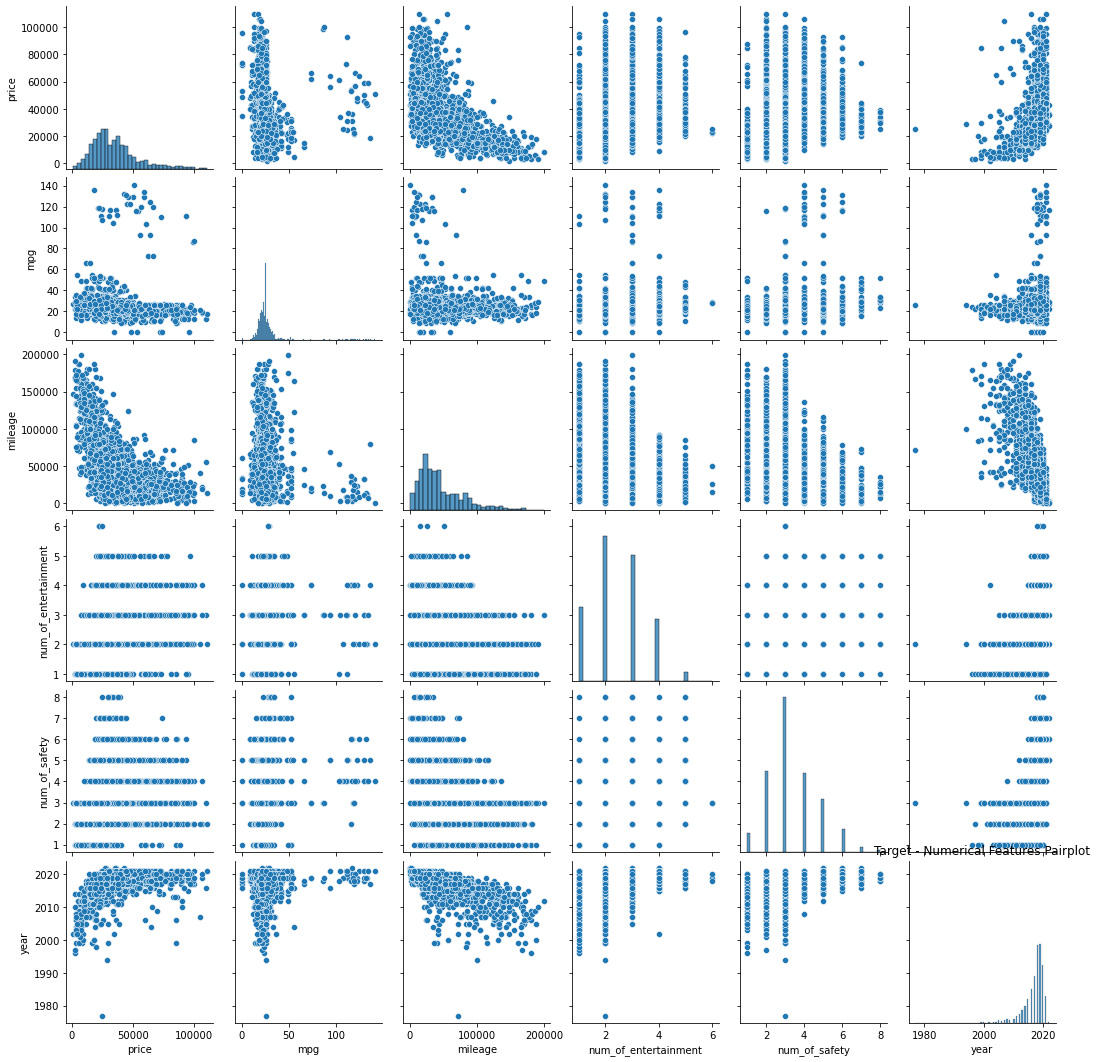

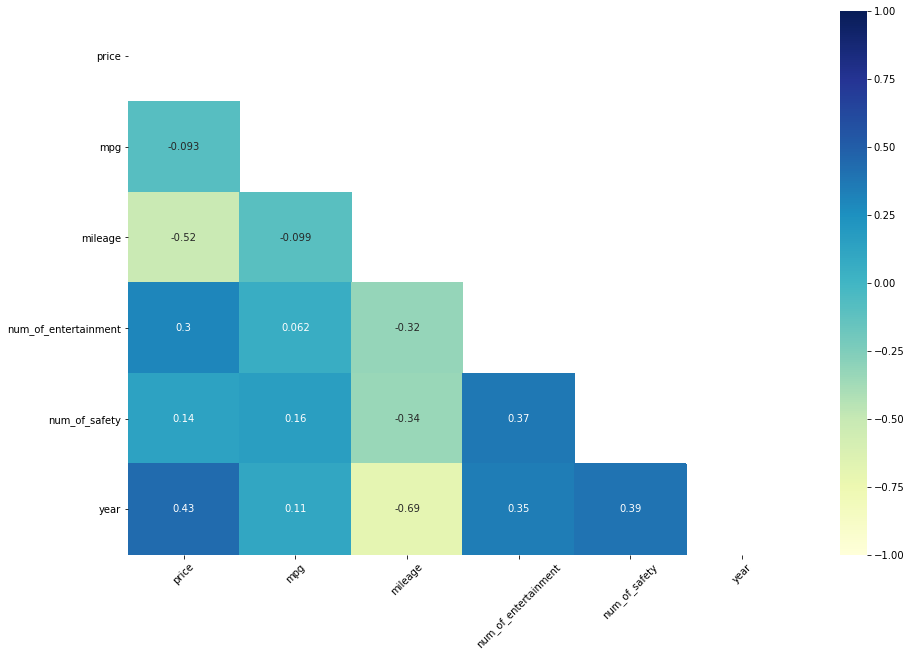

In [3]:
# Web scraping, data cleaning, and data updating
pipeline(13, [78704, 90001, 94114, 97214])

In [4]:
# Get best hyperparameters for the model
get_best_param(n_estimators = [500], 
               max_depth = [None, 30, 100, 200, 300, 400],
               min_samples_split = [2, 5, 10, 15],
               max_features = ['auto', 'log2'])

Best params:  {'max_depth': 400, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 500}
Best estimator:  RandomForestRegressor(max_depth=400, max_features='log2', n_estimators=500)
Best score:  0.7535027885095599


In [5]:
# Scores of model after hyperparameter tuning
scores_with_best_param(n_estimators = 500, 
                       max_depth = 400, 
                       min_samples_split = 2, 
                       max_features = 'log2')

Metrics of Final Model With Train/Validation Data Combined:
Test R^2: 0.807
MAE: 5606.140
